### Plot Pupil ISC data
The purpose of this notebook is to plot the aggregated pupil-data (by video & condition) in a cohesive way

#### load relevant modules

In [172]:
import os, glob, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

import numpy as np
from scipy import interpolate
import seaborn as sns

#### set up list of files and subjects

In [173]:
file_in_path = '../data/02_aggregate_video_data/'

file_list = [   'commercial_milk_30s',
                'commercial_starbucks_30s',
                'commercial_dominos_30s',
                'health_diet_30s',
                'health_weight_30s',
                'health_covid_vaccine_30s',
                'commercial_progressive_30s',
                'commercial_publix_30s',
                'commercial_carscom_30s',
                'health_fitness_30s',
                'health_prediabetes_30s',
                'health_drunk_driving_30s',
                'commercial_lego_30s',
                'health_mantherapy_30s',
                'health_alcohol_30s',
                'commercial_meta_quest_2_30s',
                'health_vaping_30s',
                'commercial_google_pixel_30s',
                'commercial_jersey_mikes_30s',
                'health_stroke_30s',
                'commercial_cookies_30s',
                'commercial_puma_30s',
                'commercial_aribnb_30s',
                'commercial_att_30s',
                'health_kidney_30s',
                'commercial_hr_block_30s',
                'commercial_under_armour_30s',
                'commercial_expedia_30s',
                'commercial_doritos_30s',
                'health_alzheimers_30s']

file_title_list = [   'Milk',
                'Starbucks',
                'Dominos',
                'Diet',
                'Weight',
                'Covid vaccine',
                'Progressive',
                'Publix',
                'Carscom',
                'Fitness',
                'Prediabetes',
                'Drunk driving',
                'Lego',
                'Mantherapy',
                'Alcohol',
                'Meta Quest',
                'Vaping',
                'Google Pixel',
                'Jersey Mikes',
                'Stroke',
                'Cookies',
                'Puma',
                'AirBnB',
                'AT&T',
                'Kidney',
                'HR Block',
                'Under Armour',
                'Expedia',
                'Doritos',
                'Alzheimers']

print(len(file_list))

endings = [#'_50nd',
           #'_50wd',
           '_100']

30


#### Aggregate over spots and save out NPY-files

In [176]:
for curr_file in file_list:
    #print(curr_file)
    for curr_ending in endings:
        #if curr_ending == '_100':
            #print(curr_ending)
            current_name = curr_file + curr_ending
            #print(current_name)
                   
            current_file = file_in_path + current_name + '.npy'
            current_data = np.load(current_file)
            #print(current_file)
            
            m1 = np.nanmean(current_data[:10, :], axis = 0)
            m1 = m1 - np.mean(m1[:200])
            m2 = np.nanmean(current_data[10:, :], axis = 0)
            m2 = m2 - np.mean(m2[:200])

            #plt.figure(figsize = (3., 1.5));
            #plt.plot(m1);
            #plt.plot(m2);
            ##plt.ylim([-1, 2.])
            #plt.grid(False)
            #plt.tight_layout()
            #plt.show()

0.9270435825086306

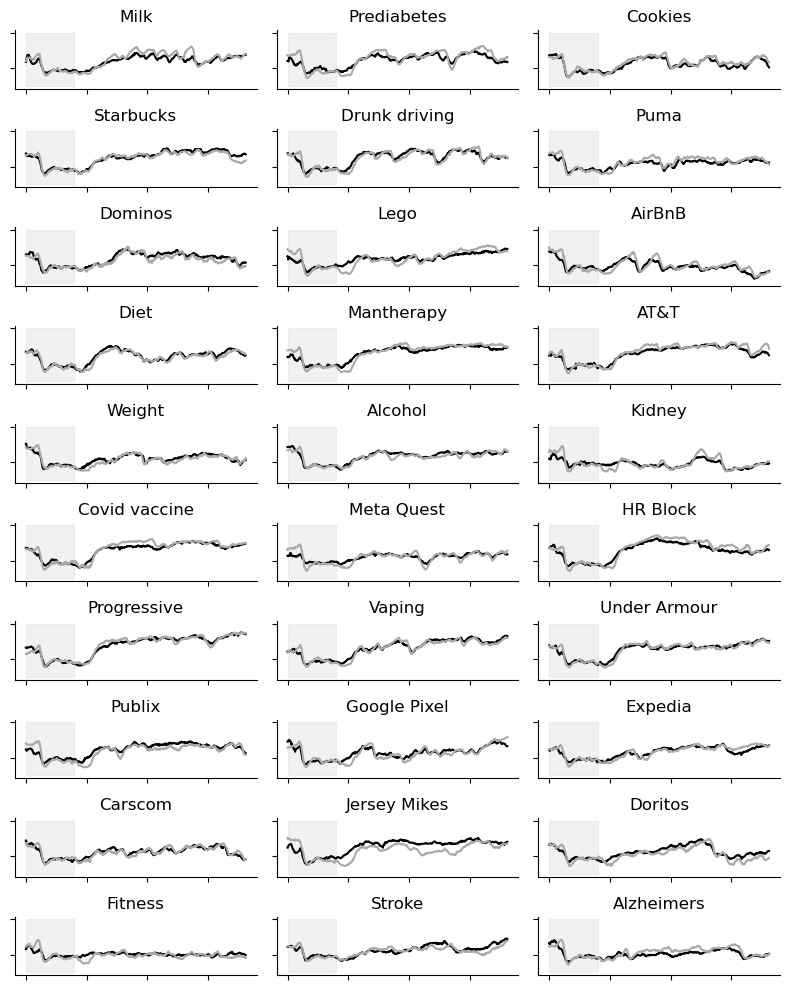

In [205]:
import matplotlib.pyplot as plt

by_spot_isc = []

# Create a 3x10 layout of subplots
fig, axes = plt.subplots(10, 3, figsize=(8, 10))

# Add your plots and titles to each subplot
counter = 0

x_values = np.linspace(0, 200, 100) 
shaded_region = (x_values >= 0) & (x_values <= 160)


for j in range(3):
    #print('-----')
    for i in range(10):
        
        #print( i)
        #print(j)
        counter = counter + 1
        file_to_pick = file_list[counter-1]
        title_text = file_title_list[counter-1]
        #print(file_to_pick)        
        
        current_name = file_to_pick + curr_ending                   
        current_file = file_in_path + current_name + '.npy'
        current_data = np.load(current_file)
        #print(current_file)
            
        m1 = np.nanmean(current_data[:10, :], axis = 0)
        m1 = m1 - np.mean(m1[:200])
        m2 = np.nanmean(current_data[10:, :], axis = 0)
        m2 = m2 - np.mean(m2[:200])
        by_spot_isc.append(np.corrcoef(m1[350:], m2[350:])[0,1])
        
        
        ax = axes[i, j]
        # ax.plot([0, 1], [0, 1])  # Replace this with your own plot data
        ax.plot(m1, color = 'black')  
        ax.plot(m2 , color = 'darkgray')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        
        ax.fill_between(x_values, -1, 2, where=shaded_region, color='lightgray', alpha=0.3)  # Adjust color and alpha as needed

        
        #ax.set_title(f'Subplot {i+1}-{j+1}')
        ax.set_title(title_text)
        ax.set_xticklabels([])
        ax.set_yticklabels([])


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [206]:
by_spot_isc

[0.7197310537469828,
 0.7715678185409611,
 0.795588850354484,
 0.8746538883963116,
 0.8063356208348745,
 0.49208592169804044,
 0.8781417980766594,
 0.5430275074707201,
 0.8396163501179635,
 0.07781484707247179,
 0.744456807607205,
 0.8613340603902409,
 0.8788063702211256,
 0.6453981434000662,
 0.5547540537041927,
 0.8646155507551923,
 0.8522748021015704,
 0.9079391821632372,
 0.6868991175850951,
 0.6726617044422701,
 0.8647801192415056,
 0.7445455841213856,
 0.8534483786723623,
 0.7018672994081393,
 0.939972190977882,
 0.8916079229593761,
 0.8033049554605232,
 0.4191042239811136,
 0.898779698401408,
 0.7447294207648801]

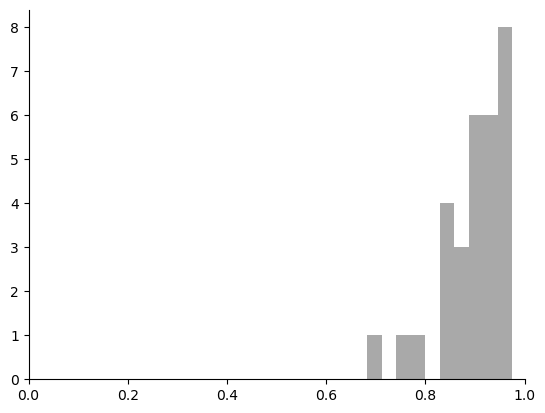

In [204]:
plt.hist(by_spot_isc, color = 'darkgray')
plt.xlim([0,1])
sns.despine()

### Zoom in for Milk, prediabetes, and Cookies and compare also across 100, 50nd, and 50wd

In [178]:
file_list2 = [ 'commercial_milk_30s_100',
               'commercial_milk_30s_50nd',
               'commercial_milk_30s_50wd',
               'health_prediabetes_30s_100',
               'health_prediabetes_30s_50nd',
               'health_prediabetes_30s_50wd',
               'commercial_cookies_30s_100',
               'commercial_cookies_30s_50nd',
               'commercial_cookies_30s_50wd']

file_title_list2 = ['Milk \n100%',
                    '50%nd',
                    '50%wd',
                    'Prediabetes \n100%',
                    '50%nd',
                    '50%wd',
                    'Cookies \n100%',
                    '50%nd',
                    '50%wd']

color_list2 = ['red',
               'red',
               'red',
               'green',
               'green',
               'green',
               'blue',
               'blue',
               'blue']


print(len(file_list2))

9


0
../data/02_aggregate_video_data/commercial_milk_30s_100.npy
1
../data/02_aggregate_video_data/commercial_milk_30s_50nd.npy
2
../data/02_aggregate_video_data/commercial_milk_30s_50wd.npy
0
../data/02_aggregate_video_data/health_prediabetes_30s_100.npy
1
../data/02_aggregate_video_data/health_prediabetes_30s_50nd.npy
2
../data/02_aggregate_video_data/health_prediabetes_30s_50wd.npy
0
../data/02_aggregate_video_data/commercial_cookies_30s_100.npy
1
../data/02_aggregate_video_data/commercial_cookies_30s_50nd.npy
2
../data/02_aggregate_video_data/commercial_cookies_30s_50wd.npy


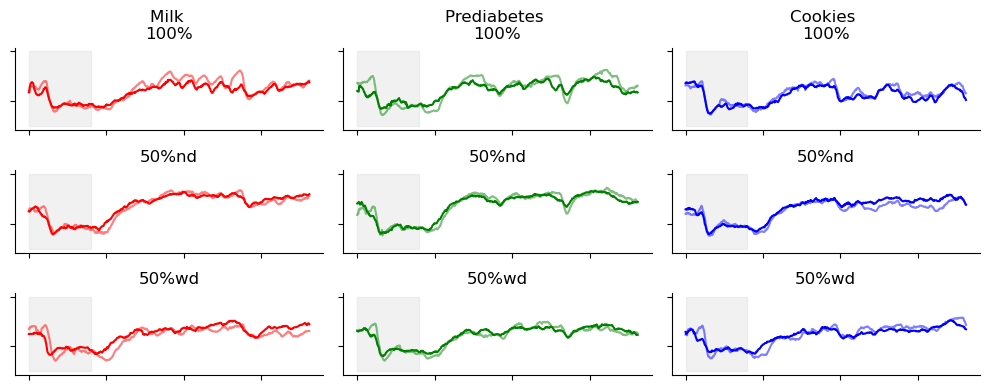

In [194]:
import matplotlib.pyplot as plt

# Create a 3x10 layout of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 4))

# Add your plots and titles to each subplot
counter = 0

#x_values = np.linspace(0, 200, 100) 
#shaded_region = (x_values >= 0) & (x_values <= 160)

all_data_list = []
all_data_list_names = []

for j in range(3):
    #print('-----')
    for i in range(3):
        
        print( i)
        #print(j)
        counter = counter + 1
        file_to_pick2 = file_list2[counter-1]
        title_text2 = file_title_list2[counter-1]
        #print(file_to_pick)        
        
        current_name = file_to_pick2 #+ curr_ending                   
        current_file = file_in_path + current_name + '.npy'
        current_data = np.load(current_file)
        print(current_file)
            
        m1 = np.nanmean(current_data[:10, :], axis = 0)
        m1 = m1 - np.mean(m1[:200])
        m2 = np.nanmean(current_data[10:, :], axis = 0)
        m2 = m2 - np.mean(m2[:200])
        
        m_all = np.nanmean(current_data, axis = 0)
        m_all = m_all - np.mean(m_all[:200])
        
        all_data_list.append(m_all[380:])
        all_data_list_names.append(title_text2 )
        #all_data_list.append(m1[180:])
        #all_data_list.append(m2[180:])
        #all_data_list_names.append(title_text2 + '_1')
        #all_data_list_names.append(title_text2 + '_2')
        
        ax = axes[i, j]
        # ax.plot([0, 1], [0, 1])  # Replace this with your own plot data
        ax.plot(m1, color = color_list2[counter-1])  
        ax.plot(m2 , color = color_list2[counter-1], alpha = 0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        
        ax.fill_between(x_values, -1, 2, where=shaded_region, color='lightgray', alpha=0.3)  # Adjust color and alpha as needed

        
        #ax.set_title(f'Subplot {i+1}-{j+1}')
        ax.set_title(title_text2)
        ax.set_xticklabels([])
        ax.set_yticklabels([])


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

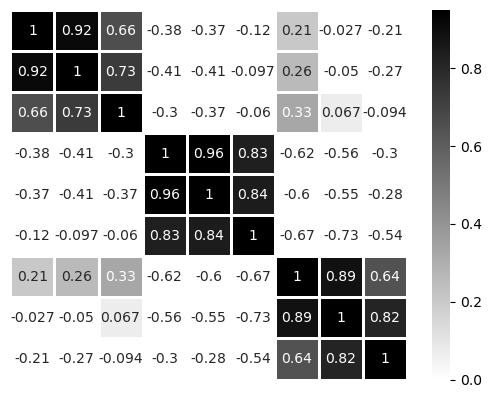

In [196]:
all_data_list = np.asarray(all_data_list)

all_data_list = np.asarray(all_data_list)


g = sns.heatmap(np.corrcoef(all_data_list), vmin = 0, vmax = 0.95, cmap = 'gray_r', 
           annot=True,
           linewidths=2,
           linecolor='white')
#plt.colorbar()

# Set custom y-axis labels
#plt.yticks(np.arange(len(all_data_list_names)), all_data_list_names, rotation=90 );
#g.set_yticklabels(rotation=30) 


plt.xticks([]);
plt.yticks([]);


plt.setp(g.get_yticklabels(), rotation=90);


